![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# MACHINE LEARNING IN PRACTICE: END MODULE ASSIGNMENT

The objective of this assignment is to help with the development of machine learning-based models for predicting atmospheric emissions (and pollution) from data gathered by various borough and county environment monitoring units; by carrying out a number of tasks using the Anaconda/Scikit-Learn Python ML framework and its components.


## Datasets overview:

The **London Atmospheric Emissions Inventory (LAEI) 2019 Update provides** a comprehensive analysis of air quality in London, focusing on emissions and concentrations of pollutants such as nitrogen oxides (NOx), particulate matter (PM10 and PM2.5), and nitrogen dioxide (NO2).


1. **Emissions Reductions**:
   - **NOx emissions** decreased by 18% between 2016 and 2019, with further reductions of 31% and 44% expected by 2025 and 2030, respectively.
   - **PM10 emissions** fell by 4% from 2016 to 2019, with projected reductions of 7% by 2025 and 12% by 2030.
   - **PM2.5 emissions** dropped by 5% from 2016 to 2019, with forecasts indicating reductions of 11% by 2025 and 18% by 2030.
   - Road transport remains a significant source of emissions, but policies like the Ultra Low Emission Zone (ULEZ) have accelerated reductions.

2. **Air Quality Concentrations**:
   **NO2 concentrations** decreased by 22% from 2016 to 2019, and further reductions are expected. However, no areas of London are projected to meet the WHO annual mean guideline of 10 µg/m³ by 2030.
   - **PM10 concentrations** fell by 24% from 2016 to 2019, with most areas meeting the WHO interim target of 15 µg/m³.
   - **PM2.5 concentrations** dropped by 19% from 2016 to 2019, but no areas are expected to meet the WHO guideline of 5 µg/m³ by 2030.

3. **Population Exposure**:
   - In 2019, nearly 9 million Londoners lived in areas exceeding the WHO interim target for NO2 (20 µg/m³), which is expected to decrease significantly by 2030.
   - All Londoners live in areas exceeding the WHO guidelines for NO2 (10 µg/m³) and PM2.5 (5 µg/m³), and this is unlikely to change by 2030 without further action.

4. **Impact on Schools, Hospitals, and Care Homes**:
   - **Schools**: 99% of educational establishments exceeded the WHO interim target for NO2 in 2019, with improvements expected by 2030. However, all schools will still exceed the WHO guidelines for NO2 and PM2.5.
   - **Hospitals**: 98% of hospitals exceeded the WHO interim target for NO2 in 2019, with improvements forecasted. However, all hospitals will continue to exceed WHO guidelines for NO2 and PM2.5.
   - **Care Homes**: All care homes exceeded the WHO interim target for NO2 in 2019, with significant improvements expected by 2030. However, all will still exceed WHO guidelines for NO2 and PM2.5.

5. **Major Roads and Transport**:
   - No major roads in London met the WHO annual mean guideline for NO2 (10 µg/m³) in 2019, which is unlikely to change by 2030.
   - The Transport for London Road Network (TLRN) is expected to significantly improve, with 99% of roads meeting the UK legal limit for NO2 (40 µg/m³) by 2030.

6. **Policy Impact**:
   - The Mayor’s policies, including the ULEZ and Low Emission Zone (LEZ), have significantly reduced emissions, mainly from road transport.
   However, to meet WHO guidelines, further action is needed to address non-transport sources of pollution, such as construction, wood burning, and industrial processes.

7. **WHO Guidelines vs. UK Legal Limits**:
   - The WHO updated its air quality guidelines in 2021, setting stricter targets for NO2 (10 µg/m³) and PM2.5 (5 µg/m³). London is not expected to meet these guidelines by 2030 without additional measures.
   - The UK legal limits for PM2.5 (10 µg/m³ by 2040) are less stringent than the WHO guidelines, and the Mayor has committed to achieving the WHO target for PM2.5 by 2030.



#### Emissions Data – Source Apportionment 

The LAEI provides a breakdown of pollutant emissions by source, for 1km grid square resolution. The summary charts below show that, in 2019, the largest contributing source for NOx and PM2.5 emissions was from road transport at 43% and 31% respectively. For PM10, in 2019, the largest contributing source is construction at 30%, closely followed by road transport at 27%.

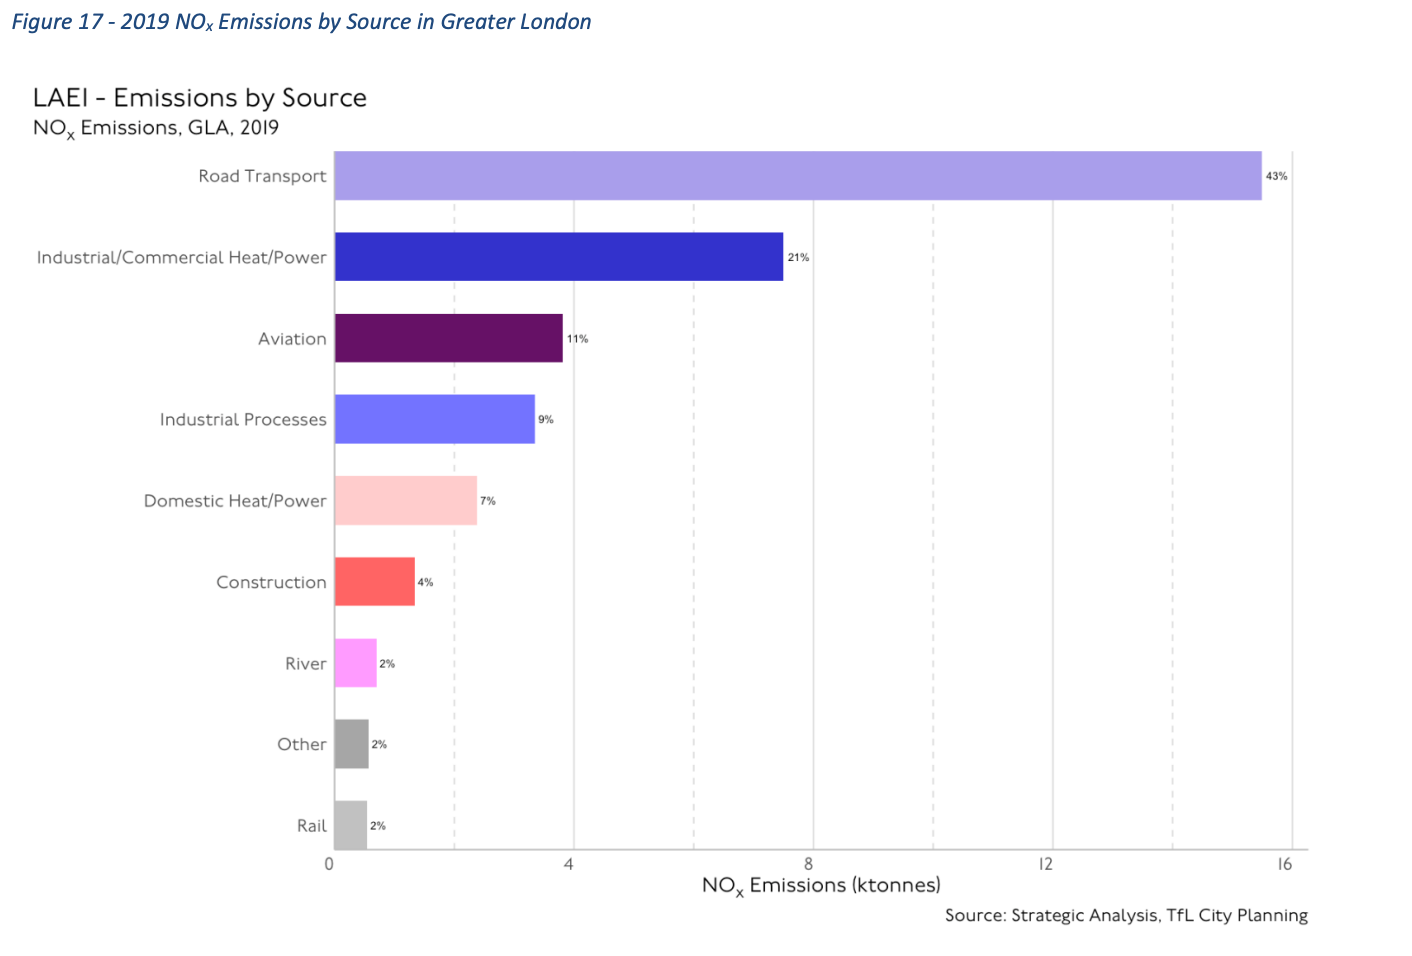

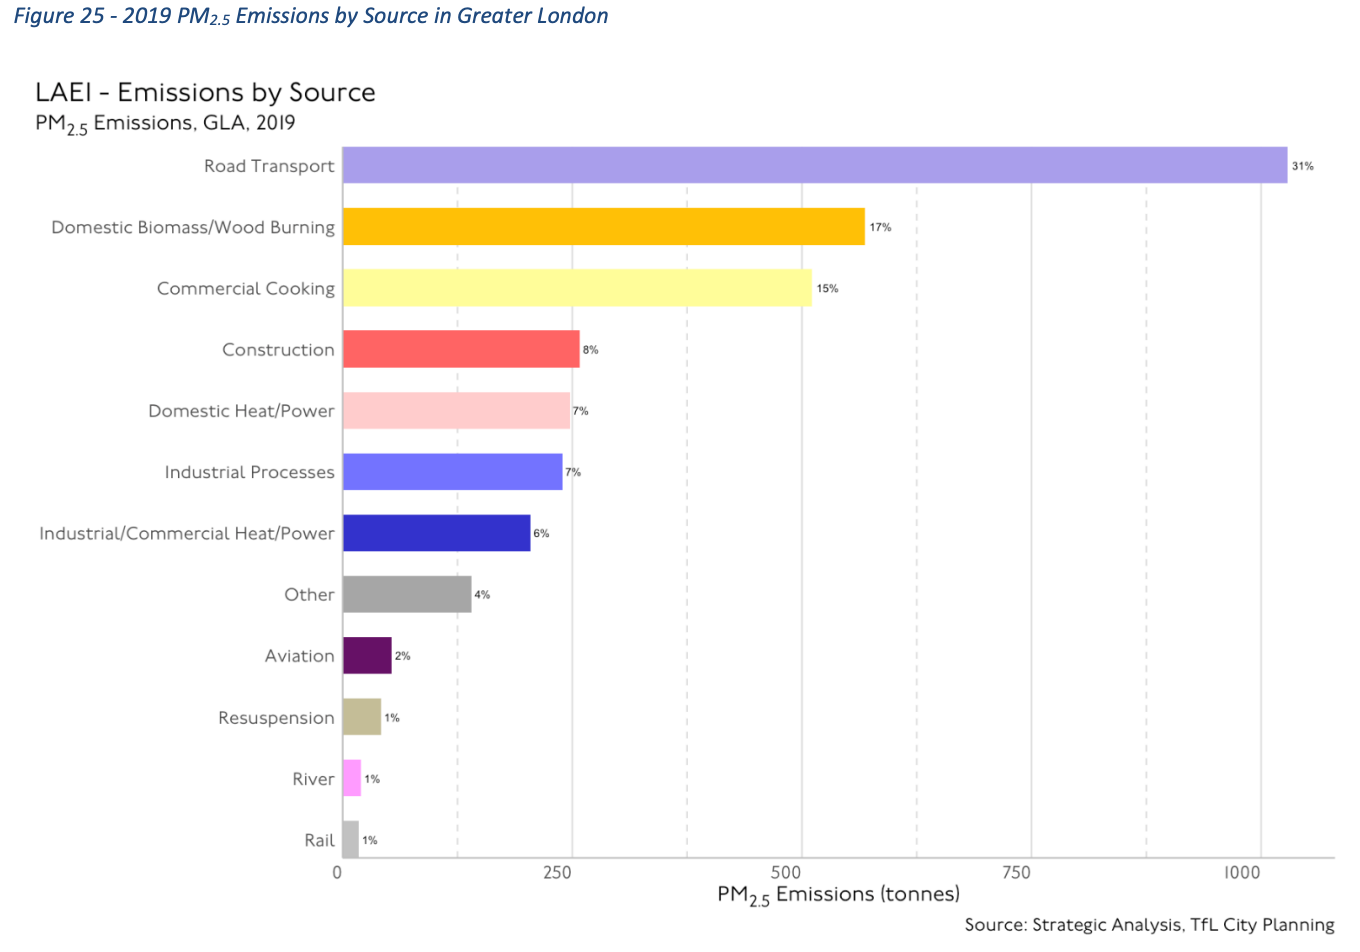

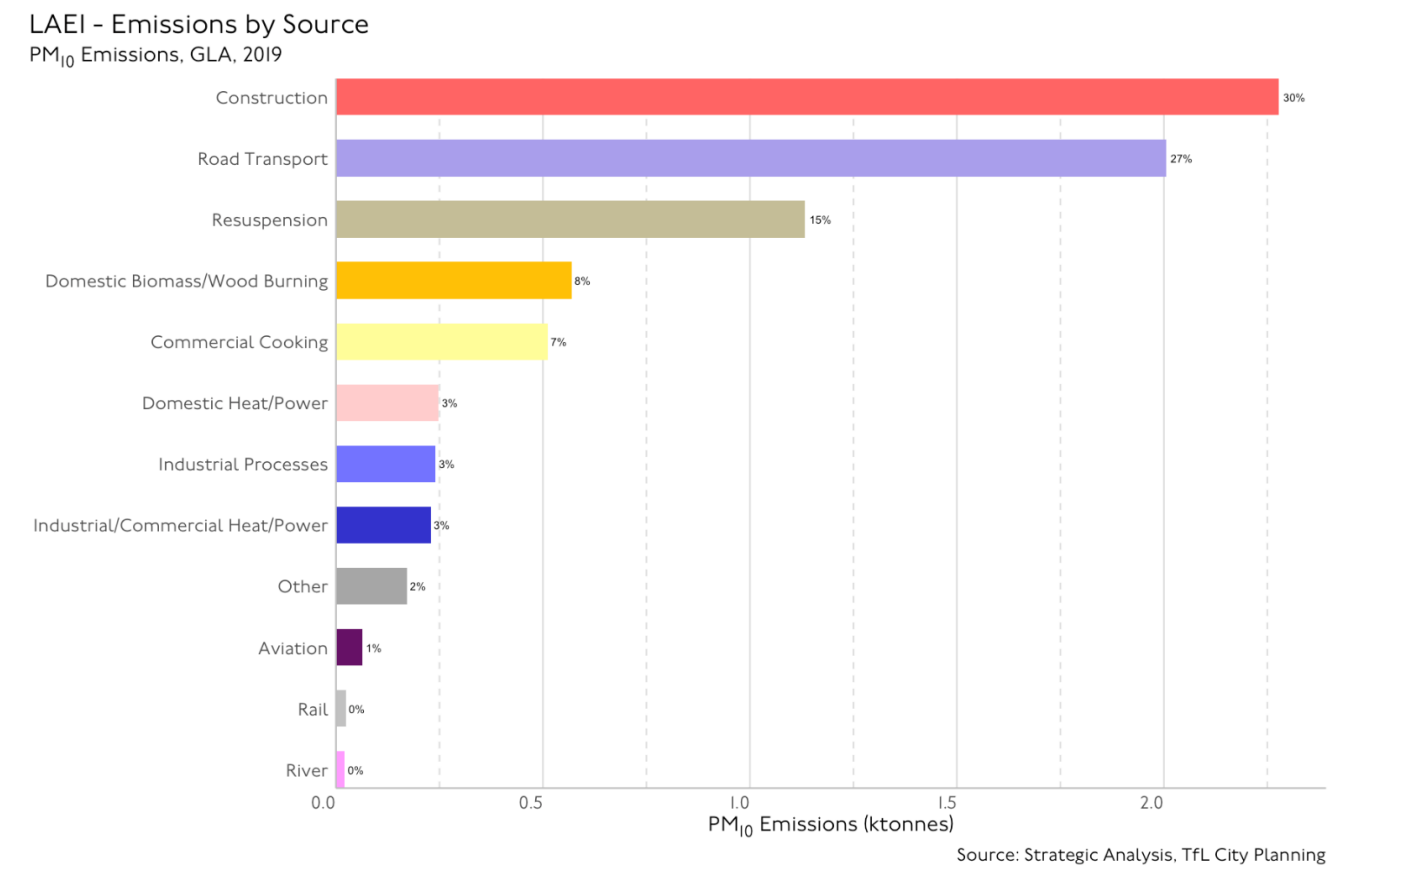

## Selection of the dataset to explore in the context of this assignment

Various datasets are available in the context of this assignment.

While reviewing them, my suggestion will be that we work with **major roads traffic** (laei-2019-major-roads-vkm-flows-speeds.xlsx) and **major-roads-link-emissions** (LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx)

The **major-roads-link-emissions** dataset includes emissions of key pollutants NOx, PM10, PM2.5, and CO2 in tonnes/year for 2019, 2025, and 2030, while the **major roads traffic** dataset includes _Annual Average Daily Traffic_ (AADT) and _Vehicle Kilometers Traveled_VKM for diverse types of cars.

We would like to provide insights and predictions related to vehicles on the major roads. This will help to quantify and predict the impact on vehicles on schemes such as the Ultra Low Emission Zone (ULEZ) and the London-wide Low Emission Zone (LEZ).

#### The objective we are trying to achieve

- Prediction ...
- ...
 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 1: Preparing datasets

In [ ]:
# install dependencies to import geopandas and folium
%pip install geopandas
%pip install folium

In [2]:
# loading necessary libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
import folium
import pandas as pd
from IPython.display import display, IFrame
from pyproj import Transformer
from sklearn import feature_selection

In [3]:
traffic_df = pd.read_excel('./LAEI2019_dataset/laei-2019-major-roads-vkm-flows-speeds.xlsx')
traffic_df.head()

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,...,50,3659,736,1451,531,2759,3659,-,327,231749
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,...,78,1718,344,687,258,1289,1718,-,1160,295268
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,...,57,1377,275,551,192,1042,1377,-,7746,158880
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,...,2066,63666,12679,25359,9172,48019,63396,-,97388,4851571
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,...,11,465,94,185,67,352,465,-,446,43270


In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79437 entries, 0 to 79436
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Year                                             79437 non-null  int64 
 1   TOID                                             79437 non-null  object
 2   LAEI Zone                                        79437 non-null  object
 3   Borough                                          79437 non-null  object
 4   Road Classification                              79437 non-null  object
 5    AADT Motorcycle                                 79437 non-null  object
 6    AADT Taxi                                       79437 non-null  object
 7    AADT Petrol Car                                 79437 non-null  object
 8    AADT Diesel Car                                 79437 non-null  object
 9    AADT Electric Car                     

In [5]:
traffic_df.describe(include='all')

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
count,79437.0,79437,79437,79437,79437,79437,79437,79437,79437,79437.0,...,79437,79437,79437,79437,79437,79437,79437,79437,79437,79437
unique,NaN,79437,4,34,12,1722,3119,12632,9719,233.0,...,2912,19386,7906,10758,5166,7782,10880,19413,15519,71678
top,NaN,osgb4000000027947700,Outer London,Non-GLA,A Road,-,-,-,-,15.0,...,-,-,-,-,-,-,-,-,-,-
freq,NaN,1,40317,12423,39533,765,1671,1267,1267,1631.0,...,1366,3517,5636,5664,12142,8589,8453,25624,12893,689
mean,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
traffic_df['Road Classification'].unique()

array(['A Road', 'B Road', 'C / Unclassified Road', 'M1', 'M20', 'M3',
       'M23', 'M40', 'M11', 'M4', 'A1M', 'M25'], dtype=object)

In [7]:
# check if 'TOID' field has duplicates
traffic_df['TOID'].duplicated().sum()

0

In [8]:
# check worksheets in the excel file
emissions_roads_excel = pd.ExcelFile('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx')    
emissions_roads_excel.sheet_names

['NOx Road Link Emissions',
 'PM10 Road Link Emissions',
 'PM2.5 Road Link Emissions',
 'CO2 Road Link Emissions']

In [9]:
# get data from all worksheets seprarately in different dataframes
no2_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='NOx Road Link Emissions')

pm10_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='PM10 Road Link Emissions')

pm25_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='PM2.5 Road Link Emissions')

co2_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='CO2 Road Link Emissions')

co2_emissions_df.head()

,TOID,pollutant,emissions-units,Road-Car-Petrol-2019,Road-Car-Petrol-2025,Road-Car-Petrol-2030,Road-Car-Diesel-2019,Road-Car-Diesel-2025,Road-Car-Diesel-2030,Road-Car-Electric-2019,...,Road-Non-TfL-Bus-or-Coach-2030,Road-Taxi-2019,Road-Taxi-2025,Road-Taxi-2030,Road-Motorcycle-2019,Road-Motorcycle-2025,Road-Motorcycle-2030,Road-Total-2019,Road-Total-2025,Road-Total-2030
0,osgb4000000027865913,co2,tonnes/year,2763.570199,2331.358518,1706.930609,1705.209185,893.262488,461.235628,0.0,...,253.876434,6.324683,3.332339,1.801842,29.259917,29.957944,28.041087,7904.895141,6730.431700,5023.778425
1,osgb4000000027865914,co2,tonnes/year,2713.376548,2445.292626,1789.577008,1685.076926,940.003021,485.041539,0.0,...,307.521319,10.150393,5.607914,2.804731,30.827275,33.181880,30.921935,8702.673969,7866.363031,5926.646651
2,osgb4000000027865915,co2,tonnes/year,2404.585777,2609.937306,2776.488023,2590.502348,2173.106234,1571.199321,0.0,...,114.267378,10.734438,5.163807,2.831386,33.561561,33.583030,34.648523,15337.814806,14812.885648,13912.809961
3,osgb4000000027865916,co2,tonnes/year,2721.333674,3074.072175,3293.418440,2950.786728,2566.017631,1870.396514,0.0,...,110.441763,8.142775,4.420546,2.143181,37.795995,39.170888,40.706873,16930.355691,15343.751319,14525.422626
4,osgb4000000027865917,co2,tonnes/year,1624.662654,1806.606755,1913.067620,1759.154539,1504.997527,1083.956175,0.0,...,92.608975,9.103467,4.415462,2.304611,22.900134,23.363167,24.046898,10109.447860,9628.842597,9045.109539


In [10]:
# rename columns in the emissions dataframes to have a prefix of the pollutant name, example 'NO2_', except 'TOID', 'pollutant', 'year', 'emissions-units' columns
no2_emissions_df = no2_emissions_df.add_prefix('NO2_')
pm10_emissions_df = pm10_emissions_df.add_prefix('PM10_')
pm25_emissions_df = pm25_emissions_df.add_prefix('PM25_')
co2_emissions_df = co2_emissions_df.add_prefix('CO2_')

# rename these columns to its original name ('TOID', 'pollutant', 'emissions-units', 'pm-source')
no2_emissions_df.rename(columns={'NO2_TOID':'TOID', 'NO2_pollutant':'pollutant', 'NO2_emissions-units':'emissions-units'}, inplace=True)
pm10_emissions_df.rename(columns={'PM10_TOID':'TOID', 'PM10_pollutant':'pollutant', 'PM10_emissions-units':'emissions-units', 'PM10_pm-source':'pm-source'}, inplace=True)
pm25_emissions_df.rename(columns={'PM25_TOID':'TOID', 'PM25_pollutant':'pollutant', 'PM25_emissions-units':'emissions-units', 'PM25_pm-source':'pm-source'}, inplace=True)
co2_emissions_df.rename(columns={'CO2_TOID':'TOID', 'CO2_pollutant':'pollutant', 'CO2_emissions-units':'emissions-units'}, inplace=True)

In [11]:
no2_emissions_df

,TOID,pollutant,emissions-units,NO2_Road-Car-Petrol-2019,NO2_Road-Car-Petrol-2025,NO2_Road-Car-Petrol-2030,NO2_Road-Car-Diesel-2019,NO2_Road-Car-Diesel-2025,NO2_Road-Car-Diesel-2030,NO2_Road-Car-Electric-2019,...,NO2_Road-Non-TfL-Bus-or-Coach-2030,NO2_Road-Taxi-2019,NO2_Road-Taxi-2025,NO2_Road-Taxi-2030,NO2_Road-Motorcycle-2019,NO2_Road-Motorcycle-2025,NO2_Road-Motorcycle-2030,NO2_Road-Total-2019,NO2_Road-Total-2025,NO2_Road-Total-2030
0,osgb4000000027865913,nox,tonnes/year,1.590568,9.373899e-01,6.880894e-01,6.993015,2.547169e+00,9.822049e-01,0.0,...,0.023191,0.030217,0.014223,0.005184,0.077711,0.051392,0.041953,17.808298,8.254211,4.029097
1,osgb4000000027865914,nox,tonnes/year,1.565236,9.775671e-01,7.155609e-01,7.108021,2.708920e+00,1.042307e+00,0.0,...,0.026764,0.050126,0.024463,0.008259,0.083772,0.057642,0.046855,20.860706,9.952764,4.814753
2,osgb4000000027865915,nox,tonnes/year,1.031740,1.080352e+00,1.178718e+00,10.018715,6.731314e+00,3.615768e+00,0.0,...,0.031377,0.045132,0.019841,0.007274,0.059342,0.034413,0.031767,26.321512,16.339590,10.312898
3,osgb4000000027865916,nox,tonnes/year,1.146019,1.213445e+00,1.327884e+00,11.792383,8.352974e+00,4.484705e+00,0.0,...,0.018603,0.035638,0.019018,0.006219,0.076658,0.053396,0.049647,29.731963,20.342981,12.889449
4,osgb4000000027865917,nox,tonnes/year,0.686157,7.205359e-01,7.801701e-01,6.986898,4.826629e+00,2.565473e+00,0.0,...,0.016966,0.039542,0.018417,0.006470,0.045465,0.030134,0.027751,18.725408,12.078740,7.614331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79434,osgb9999000000047000,nox,tonnes/year,NaN,5.664444e-05,6.689555e-04,NaN,1.153931e-04,6.867390e-04,NaN,...,0.000000,NaN,0.003325,0.001168,NaN,0.000078,0.000088,NaN,0.005908,0.003115
79435,osgb9999000000048000,nox,tonnes/year,NaN,8.299204e-08,8.321453e-09,NaN,1.728028e-07,8.851375e-09,NaN,...,0.000000,NaN,0.000000,0.000000,NaN,0.000012,0.000009,NaN,0.000012,0.000009
79436,osgb9999000000049000,nox,tonnes/year,NaN,1.863873e-08,1.839120e-09,NaN,4.016131e-08,2.057784e-09,NaN,...,0.000000,NaN,0.000000,0.000000,NaN,0.000003,0.000002,NaN,0.000003,0.000002
79437,osgb9999000000050000,nox,tonnes/year,NaN,8.916747e-03,5.858588e-03,NaN,1.797791e-02,5.904144e-03,NaN,...,0.000000,NaN,0.007144,0.002697,NaN,0.000729,0.000586,NaN,0.079090,0.040831


In [12]:
# check if 'TOID' field has duplicates in the emissions dataframes
print(no2_emissions_df['TOID'].duplicated().sum())
print(pm10_emissions_df['TOID'].duplicated().sum())
print(pm25_emissions_df['TOID'].duplicated().sum())
print(co2_emissions_df['TOID'].duplicated().sum())

0
158878
158878
0


In [13]:
# PM2.5 and PM10 emissions dataframes have duplicates in 'TOID' field due to the 'pm-source' column, so we will sum all values by 'TOID' for all pm-source values within the same TOID
# sum all values by 'TOID' for all pm-source values within the same TOID
pm10_emissions_df = pm10_emissions_df.groupby(['TOID', 'pollutant', 'emissions-units']).sum().reset_index()
pm25_emissions_df = pm25_emissions_df.groupby(['TOID', 'pollutant', 'emissions-units']).sum().reset_index()

# check if 'TOID' field has duplicates in the emissions dataframes
print(pm10_emissions_df['TOID'].duplicated().sum())
print(pm25_emissions_df['TOID'].duplicated().sum())


0
0


In [14]:
# we are interested in 2019 values only, so let's filter the dataframes to have only 2019 values and drop other columns for 2025 and 2030
# drop any columns containing 2025 and 2030 in its name
no2_emissions_df = no2_emissions_df[no2_emissions_df.columns.drop(list(no2_emissions_df.filter(regex='2025')))]
no2_emissions_df = no2_emissions_df[no2_emissions_df.columns.drop(list(no2_emissions_df.filter(regex='2030')))]

pm10_emissions_df = pm10_emissions_df[pm10_emissions_df.columns.drop(list(pm10_emissions_df.filter(regex='2025')))]
pm10_emissions_df = pm10_emissions_df[pm10_emissions_df.columns.drop(list(pm10_emissions_df.filter(regex='2030')))]

pm25_emissions_df = pm25_emissions_df[pm25_emissions_df.columns.drop(list(pm25_emissions_df.filter(regex='2025')))]
pm25_emissions_df = pm25_emissions_df[pm25_emissions_df.columns.drop(list(pm25_emissions_df.filter(regex='2030')))]

co2_emissions_df = co2_emissions_df[co2_emissions_df.columns.drop(list(co2_emissions_df.filter(regex='2025')))]
co2_emissions_df = co2_emissions_df[co2_emissions_df.columns.drop(list(co2_emissions_df.filter(regex='2030')))]

In [15]:
co2_emissions_df.head()

,TOID,pollutant,emissions-units,CO2_Road-Car-Petrol-2019,CO2_Road-Car-Diesel-2019,CO2_Road-Car-Electric-2019,CO2_Road-PHV-Petrol-2019,CO2_Road-PHV-Diesel-2019,CO2_Road-PHV-Electric-2019,CO2_Road-LGV-Petrol-2019,CO2_Road-LGV-Diesel-2019,CO2_Road-LGV-Electric-2019,CO2_Road-HGV-Rigid-2019,CO2_Road-HGV-Articulated-2019,CO2_Road-TfL-Bus-2019,CO2_Road-Non-TfL-Bus-or-Coach-2019,CO2_Road-Taxi-2019,CO2_Road-Motorcycle-2019,CO2_Road-Total-2019
0,osgb4000000027865913,co2,tonnes/year,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917,7904.895141
1,osgb4000000027865914,co2,tonnes/year,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275,8702.673969
2,osgb4000000027865915,co2,tonnes/year,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561,15337.814806
3,osgb4000000027865916,co2,tonnes/year,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995,16930.355691
4,osgb4000000027865917,co2,tonnes/year,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134,10109.447860


In [16]:
# emissions-units column has the same value for all rows, so we can drop it
no2_emissions_df.drop(columns=['emissions-units'], inplace=True)
pm10_emissions_df.drop(columns=['emissions-units'], inplace=True)
pm25_emissions_df.drop(columns=['emissions-units'], inplace=True)
co2_emissions_df.drop(columns=['emissions-units'], inplace=True)

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol-2019,CO2_Road-Car-Diesel-2019,CO2_Road-Car-Electric-2019,CO2_Road-PHV-Petrol-2019,CO2_Road-PHV-Diesel-2019,CO2_Road-PHV-Electric-2019,CO2_Road-LGV-Petrol-2019,CO2_Road-LGV-Diesel-2019,CO2_Road-LGV-Electric-2019,CO2_Road-HGV-Rigid-2019,CO2_Road-HGV-Articulated-2019,CO2_Road-TfL-Bus-2019,CO2_Road-Non-TfL-Bus-or-Coach-2019,CO2_Road-Taxi-2019,CO2_Road-Motorcycle-2019,CO2_Road-Total-2019
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917,7904.895141
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275,8702.673969
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561,15337.814806
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995,16930.355691
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134,10109.447860


In [17]:
# drop the total emissions columns as we are interested in the emissions by road link and same data is present in the other columns
no2_emissions_df.drop(columns=['NO2_Road-Total-2019'], inplace=True)
pm10_emissions_df.drop(columns=['PM10_Road-Total-2019'], inplace=True)
pm25_emissions_df.drop(columns=['PM25_Road-Total-2019'], inplace=True)
co2_emissions_df.drop(columns=['CO2_Road-Total-2019'], inplace=True)

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol-2019,CO2_Road-Car-Diesel-2019,CO2_Road-Car-Electric-2019,CO2_Road-PHV-Petrol-2019,CO2_Road-PHV-Diesel-2019,CO2_Road-PHV-Electric-2019,CO2_Road-LGV-Petrol-2019,CO2_Road-LGV-Diesel-2019,CO2_Road-LGV-Electric-2019,CO2_Road-HGV-Rigid-2019,CO2_Road-HGV-Articulated-2019,CO2_Road-TfL-Bus-2019,CO2_Road-Non-TfL-Bus-or-Coach-2019,CO2_Road-Taxi-2019,CO2_Road-Motorcycle-2019
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134


In [18]:
# rename columns that include '2019' in its name to remove it and tide up the column names
no2_emissions_df.columns = no2_emissions_df.columns.str.replace('-2019', '')
pm10_emissions_df.columns = pm10_emissions_df.columns.str.replace('-2019', '')
pm25_emissions_df.columns = pm25_emissions_df.columns.str.replace('-2019', '')
co2_emissions_df.columns = co2_emissions_df.columns.str.replace('-2019', '')

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol,CO2_Road-Car-Diesel,CO2_Road-Car-Electric,CO2_Road-PHV-Petrol,CO2_Road-PHV-Diesel,CO2_Road-PHV-Electric,CO2_Road-LGV-Petrol,CO2_Road-LGV-Diesel,CO2_Road-LGV-Electric,CO2_Road-HGV-Rigid,CO2_Road-HGV-Articulated,CO2_Road-TfL-Bus,CO2_Road-Non-TfL-Bus-or-Coach,CO2_Road-Taxi,CO2_Road-Motorcycle
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134


In [19]:
# drop 'pm-source' column as it is not required after summing all values by 'TOID' for all pm-source values within the same TOID
pm10_emissions_df.drop(columns=['pm-source'], inplace=True)
pm25_emissions_df.drop(columns=['pm-source'], inplace=True)

In [20]:
# calculate the average emissions for each road link using the columns that have emissions values
no2_emissions_df['NO2_Avg'] = no2_emissions_df.iloc[:, 2:].mean(axis=1)
pm10_emissions_df['PM10_Avg'] = pm10_emissions_df.iloc[:, 2:].mean(axis=1)
pm25_emissions_df['PM25_Avg'] = pm25_emissions_df.iloc[:, 2:].mean(axis=1)
co2_emissions_df['CO2_Avg'] = co2_emissions_df.iloc[:, 2:].mean(axis=1)

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol,CO2_Road-Car-Diesel,CO2_Road-Car-Electric,CO2_Road-PHV-Petrol,CO2_Road-PHV-Diesel,CO2_Road-PHV-Electric,CO2_Road-LGV-Petrol,CO2_Road-LGV-Diesel,CO2_Road-LGV-Electric,CO2_Road-HGV-Rigid,CO2_Road-HGV-Articulated,CO2_Road-TfL-Bus,CO2_Road-Non-TfL-Bus-or-Coach,CO2_Road-Taxi,CO2_Road-Motorcycle,CO2_Avg
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917,526.993009
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275,580.178265
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561,1022.520987
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995,1128.690379
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134,673.963191


In [21]:
# let's drop the columns that have emissions values as we have calculated the average emissions for each road link
no2_emissions_df.drop(no2_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)
pm10_emissions_df.drop(pm10_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)
pm25_emissions_df.drop(pm25_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)
co2_emissions_df.drop(co2_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)

co2_emissions_df.head()

,TOID,pollutant,CO2_Avg
0,osgb4000000027865913,co2,526.993009
1,osgb4000000027865914,co2,580.178265
2,osgb4000000027865915,co2,1022.520987
3,osgb4000000027865916,co2,1128.690379
4,osgb4000000027865917,co2,673.963191


In [22]:
# let us derop the 'pollutant' column as it is not required
no2_emissions_df.drop(columns=['pollutant'], inplace=True)
pm10_emissions_df.drop(columns=['pollutant'], inplace=True)
pm25_emissions_df.drop(columns=['pollutant'], inplace=True)
co2_emissions_df.drop(columns=['pollutant'], inplace=True)

In [23]:
# merge the 4 emissions dataframes in a single dataframe using 'TOID' as the key
emissions_df = pd.merge(no2_emissions_df, pm10_emissions_df, on='TOID', how='outer')
emissions_df = pd.merge(emissions_df, pm25_emissions_df, on='TOID', how='outer')
emissions_df = pd.merge(emissions_df, co2_emissions_df, on='TOID', how='outer')

emissions_df.head()

,TOID,NO2_Avg,PM10_Avg,PM25_Avg,CO2_Avg
0,osgb4000000027865913,1.187220,0.058674,0.039993,526.993009
1,osgb4000000027865914,1.390714,0.062788,0.043506,580.178265
2,osgb4000000027865915,1.754767,0.111070,0.068895,1022.520987
3,osgb4000000027865916,1.982131,0.105809,0.069126,1128.690379
4,osgb4000000027865917,1.248361,0.064831,0.042272,673.963191


In [24]:
# check missing values, seros, or NA in the road traffic dataframe  
traffic_df.isnull().sum()

# check missing values, seros, or NA in the emissions dataframe

emissions_df.isnull().sum()

TOID         0
NO2_Avg     51
PM10_Avg     0
PM25_Avg     0
CO2_Avg     51
dtype: int64

In [25]:
emissions_df.shape

(79439, 5)

In [26]:
# drop rows with missing values in the emissions dataframe
emissions_df.dropna(inplace=True)

In [27]:
# drop year column as it is not required in the traffic dataframe
traffic_df.drop(columns=['Year'], inplace=True)

In [28]:
# rename columns and tide up their names in the traffic dataframe

def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    def clean_name(col):
        col = col.strip()  # Remove leading/trailing spaces
        col = re.sub(r'\s+', '_', col)  # Replace spaces with single underscore
        col = re.sub(r'2019', '', col)  # Replace spaces with single underscore
        col = re.sub(r'[_-]+', '_', col)  # Remove excessive dashes/underscores
        col = re.sub(r'_(km_hr)', r'(km/hr)', col)  # Restore proper unit formatting
        col = re.sub(r'_(m)$', r'(m)', col)  # Restore proper unit formatting
        col = re.sub(r'_+', '_', col)  # Final clean-up of multiple underscores
        col = col.lower()  # Convert to lowercase
        return col.strip('_')  # Remove any trailing underscores

    df.columns = [clean_name(col) for col in df.columns]
    return df

    df.columns = [clean_name(col) for col in df.columns]
    return df

df = clean_column_names(traffic_df)
print(df.columns)

Index(['toid', 'laei_zone', 'borough', 'road_classification',
       'aadt_motorcycle', 'aadt_taxi', 'aadt_petrol_car', 'aadt_diesel_car',
       'aadt_electric_car', 'aadt_petrol_phv', 'aadt_diesel_phv',
       'aadt_electric_phv', 'aadt_petrol_lgv', 'aadt_diesel_lgv',
       'aadt_electric_lgv', 'aadt_hgvs_rigid_2_axles',
       'aadt_hgvs_rigid_3_axles', 'aadt_hgvs_rigid_4_or_more_axles',
       'aadt_hgvs_articulated_3_to_4_axles', 'aadt_hgvs_articulated_5_axles',
       'aadt_hgvs_articulated_6_axles', 'aadt_buses', 'aadt_coaches',
       'aadt_total', 'speed_(km/hr)_except_buses', 'speed_(km/hr)_buses_only',
       'link_length_(m)', 'vkm_motorcycle', 'vkm_taxi', 'vkm_petrol_car',
       'vkm_diesel_car', 'vkm_electric_car', 'vkm_petrol_phv',
       'vkm_diesel_phv', 'vkm_electric_phv', 'vkm_petrol_lgv',
       'vkm_diesel_lgv', 'vkm_electric_lgv', 'vkm_hgvs_rigid_2_axles',
       'vkm_hgvs_rigid_3_axles', 'vkm_hgvs_rigid_4_or_more_axles',
       'vkm_hgvs_articulated_3_to_4_axle

In [29]:
# check the missing values, zeros, NA in the traffic dataframe
traffic_df.isnull().sum()

toid                                  0
laei_zone                             0
borough                               0
road_classification                   0
aadt_motorcycle                       0
aadt_taxi                             0
aadt_petrol_car                       0
aadt_diesel_car                       0
aadt_electric_car                     0
aadt_petrol_phv                       0
aadt_diesel_phv                       0
aadt_electric_phv                     0
aadt_petrol_lgv                       0
aadt_diesel_lgv                       0
aadt_electric_lgv                     0
aadt_hgvs_rigid_2_axles               0
aadt_hgvs_rigid_3_axles               0
aadt_hgvs_rigid_4_or_more_axles       0
aadt_hgvs_articulated_3_to_4_axles    0
aadt_hgvs_articulated_5_axles         0
aadt_hgvs_articulated_6_axles         0
aadt_buses                            0
aadt_coaches                          0
aadt_total                            0
speed_(km/hr)_except_buses            0


In [30]:
# check duplicates in the traffic dataframe
traffic_df.duplicated().sum()

0

In [31]:
# drop columns with total values as same data is present in the other columns
traffic_df.drop(columns=['aadt_total', 'vkm_total'], inplace=True)

In [32]:
# drop speed and link length columns as they are not required, these columns are redundunt as they are used to calculate the vkm columns

traffic_df.drop(columns=['link_length_(m)', 'speed_(km/hr)_except_buses','speed_(km/hr)_buses_only'], inplace=True)

In [33]:
traffic_df.head()

,toid,laei_zone,borough,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,...,vkm_diesel_lgv,vkm_electric_lgv,vkm_hgvs_rigid_2_axles,vkm_hgvs_rigid_3_axles,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches
0,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,92,...,22586,50,3659,736,1451,531,2759,3659,-,327
1,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,339,...,35317,78,1718,344,687,258,1289,1718,-,1160
2,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,68,...,25937,57,1377,275,551,192,1042,1377,-,7746
3,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,395,...,941266,2066,63666,12679,25359,9172,48019,63396,-,97388
4,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,217,...,5195,11,465,94,185,67,352,465,-,446


In [34]:
traffic_df["borough"].unique()

array(['Non-GLA', 'Bromley', 'Brent', 'Barking and Dagenham',
       'Hillingdon', 'Hounslow', 'Redbridge', 'Barnet', 'Ealing',
       'Croydon', 'Bexley', 'Southwark', 'Greenwich', 'Richmond',
       'Lambeth', 'Merton', 'Kingston', 'Harrow', 'Enfield', 'Wandsworth',
       'Havering', 'Newham', 'Waltham Forest', 'Sutton', 'Lewisham',
       'Haringey', 'Westminster', 'Hammersmith and Fulham',
       'Tower Hamlets', 'Hackney', 'Kensington and Chelsea', 'Islington',
       'Camden', 'City of London'], dtype=object)

In [35]:
# convert the column names in the emissions dataframe to lowercase
emissions_df.columns = map(str.lower, emissions_df.columns)

In [36]:
# merge the traffic and emissions dataframes using 'TOID' as the key

merged_df = pd.merge(traffic_df, emissions_df, on='toid', how='inner')

In [37]:
merged_df.head()

,toid,laei_zone,borough,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,...,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg
0,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,92,...,1451,531,2759,3659,-,327,0.005753,0.000314,0.000211,2.792777
1,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,339,...,687,258,1289,1718,-,1160,0.006902,0.001202,0.000594,2.956107
2,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,68,...,551,192,1042,1377,-,7746,0.008236,0.000866,0.000439,3.176504
3,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,395,...,25359,9172,48019,63396,-,97388,0.164691,0.025206,0.012406,64.934024
4,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,217,...,185,67,352,465,-,446,0.001088,0.000063,0.000041,0.503903


In [38]:
# check values in "laei_zone" column
merged_df["laei_zone"].unique()

array(['Non-GLA', 'Outer London', 'Inner London', 'Central London'],
      dtype=object)

In [39]:
# check values in "road_classification" column
merged_df["road_classification"].unique()

array(['A Road', 'B Road', 'C / Unclassified Road', 'M1', 'M20', 'M3',
       'M23', 'M40', 'M11', 'M4', 'A1M', 'M25'], dtype=object)

In [40]:
# drop 'borough' column as it is not required
merged_df.drop(columns=['borough'], inplace=True)

In [41]:
def label_encode_dataframe(df: pd.DataFrame, categorical_cols: list):
    encoders = {}
    
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Transform column
        encoders[col] = le  # Store encoder for future use
    
    return df, encoders

In [42]:
categorical_columns = ['road_classification']

merged_df, roads_encoders = label_encode_dataframe(merged_df, categorical_columns)

In [43]:
merged_df.head()    

,toid,laei_zone,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,...,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg
0,osgb4000000027947700,Non-GLA,0,112,15,5470,3780,32,92,76,...,1451,531,2759,3659,-,327,0.005753,0.000314,0.000211,2.792777
1,osgb4000000027908760,Non-GLA,0,68,10,3049,2107,18,339,279,...,687,258,1289,1718,-,1160,0.006902,0.001202,0.000594,2.956107
2,osgb4000000027987795,Non-GLA,0,131,15,5752,3976,34,68,56,...,551,192,1042,1377,-,7746,0.008236,0.000866,0.000439,3.176504
3,osgb4000000027869099,Non-GLA,0,178,14,7280,5031,43,395,325,...,25359,9172,48019,63396,-,97388,0.164691,0.025206,0.012406,64.934024
4,osgb4000000030443012,Non-GLA,0,178,34,8433,5828,50,217,178,...,185,67,352,465,-,446,0.001088,0.000063,0.000041,0.503903


In [44]:
# apply one-hot encoding to the 'laei_zone' column
merged_df = pd.get_dummies(merged_df, columns=['laei_zone'], drop_first=True)

merged_df.head()

,toid,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
0,osgb4000000027947700,0,112,15,5470,3780,32,92,76,1,...,3659,-,327,0.005753,0.000314,0.000211,2.792777,False,True,False
1,osgb4000000027908760,0,68,10,3049,2107,18,339,279,5,...,1718,-,1160,0.006902,0.001202,0.000594,2.956107,False,True,False
2,osgb4000000027987795,0,131,15,5752,3976,34,68,56,1,...,1377,-,7746,0.008236,0.000866,0.000439,3.176504,False,True,False
3,osgb4000000027869099,0,178,14,7280,5031,43,395,325,6,...,63396,-,97388,0.164691,0.025206,0.012406,64.934024,False,True,False
4,osgb4000000030443012,0,178,34,8433,5828,50,217,178,3,...,465,-,446,0.001088,0.000063,0.000041,0.503903,False,True,False


In [45]:
print(merged_df.columns)

Index(['toid', 'road_classification', 'aadt_motorcycle', 'aadt_taxi',
       'aadt_petrol_car', 'aadt_diesel_car', 'aadt_electric_car',
       'aadt_petrol_phv', 'aadt_diesel_phv', 'aadt_electric_phv',
       'aadt_petrol_lgv', 'aadt_diesel_lgv', 'aadt_electric_lgv',
       'aadt_hgvs_rigid_2_axles', 'aadt_hgvs_rigid_3_axles',
       'aadt_hgvs_rigid_4_or_more_axles', 'aadt_hgvs_articulated_3_to_4_axles',
       'aadt_hgvs_articulated_5_axles', 'aadt_hgvs_articulated_6_axles',
       'aadt_buses', 'aadt_coaches', 'vkm_motorcycle', 'vkm_taxi',
       'vkm_petrol_car', 'vkm_diesel_car', 'vkm_electric_car',
       'vkm_petrol_phv', 'vkm_diesel_phv', 'vkm_electric_phv',
       'vkm_petrol_lgv', 'vkm_diesel_lgv', 'vkm_electric_lgv',
       'vkm_hgvs_rigid_2_axles', 'vkm_hgvs_rigid_3_axles',
       'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles',
       'vkm_hgvs_articulated_5_axles', 'vkm_hgvs_articulated_6_axles',
       'vkm_buses', 'vkm_coaches', 'no2_avg', 'pm10_av

In [46]:
# Load OS MasterMap data as a GeoDataFrame
os_data = gpd.read_file("./LAEI2019_dataset/LAEI2019-Supporting-Information-GIS-Files/Shapefile SHP/LAEI2019_Grid.shp")
os_data.head()

,Grid_ID_19,GridIdEx,1km2_ID,Easting,Northing,Area_km2,Borough,Zone,geometry
0,1,1,5910,510500,203500,1.0,NonGLA,NonGLA,"POLYGON ((511000.001 203000.001, 509999.999 20..."
1,2,2,5911,511500,203500,1.0,NonGLA,NonGLA,"POLYGON ((512000.003 203000.001, 511000.001 20..."
2,3,3,5912,512500,203500,1.0,NonGLA,NonGLA,"POLYGON ((512999.997 203000.001, 512000.003 20..."
3,4,4,5915,515500,203500,1.0,NonGLA,NonGLA,"POLYGON ((516000.004 203000.001, 515000.002 20..."
4,5,5,5916,516500,203500,1.0,NonGLA,NonGLA,"POLYGON ((516999.998 203000.001, 516000.004 20..."


In [47]:

# Load OS MasterMap data as a GeoDataFrame
os_data = gpd.read_file("./LAEI2019_dataset/LAEI2019-Supporting-Information-GIS-Files/Shapefile SHP/LAEI2019-co2-major-roads-link-emissions.shp")
print(os_data.columns)
# Create a mapping from TOID to geographic coordinates
toid_to_coordinates = {
    row['TOID']: [row.geometry.centroid.y, row.geometry.centroid.x] 
    for _, row in os_data.iterrows()
}

#print(toid_to_coordinates)

os_data.head()

Index(['TOID', 'Pollutant', 'SourceType', 'Units', 'Car_Pet_19', 'Car_Pet_25',
       'Car_Pet_30', 'Car_Die_19', 'Car_Die_25', 'Car_Die_30', 'Car_Ele_19',
       'Car_Ele_25', 'Car_Ele_30', 'PHV_Pet_19', 'PHV_Pet_25', 'PHV_Pet_30',
       'PHV_Die_19', 'PHV_Die_25', 'PHV_Die_30', 'PHV_Ele_19', 'PHV_Ele_25',
       'PHV_Ele_30', 'LGV_Pet_19', 'LGV_Pet_25', 'LGV_Pet_30', 'LGV_Die_19',
       'LGV_Die_25', 'LGV_Die_30', 'LGV_Ele_19', 'LGV_Ele_25', 'LGV_Ele_30',
       'HGV_Rig_19', 'HGV_Rig_25', 'HGV_Rig_30', 'HGV_Art_19', 'HGV_Art_25',
       'HGV_Art_30', 'TfL_Bus_19', 'TfL_Bus_25', 'TfL_Bus_30', 'Coach_19',
       'Coach_25', 'Coach_30', 'Taxi_19', 'Taxi_25', 'Taxi_30', 'MCycle_19',
       'MCycle_25', 'MCycle_30', 'All_Veh_19', 'All_Veh_25', 'All_Veh_30',
       'Info', 'geometry'],
      dtype='object')


,TOID,Pollutant,SourceType,Units,Car_Pet_19,Car_Pet_25,Car_Pet_30,Car_Die_19,Car_Die_25,Car_Die_30,...,Taxi_25,Taxi_30,MCycle_19,MCycle_25,MCycle_30,All_Veh_19,All_Veh_25,All_Veh_30,Info,geometry
0,osgb4000000027865913,co2,Exhaust,tonnes/year,2763.570199,2331.358518,1706.930609,1705.209185,893.262488,461.235628,...,3.332339,1.801842,29.259917,29.957944,28.041087,7904.895141,6730.431700,5023.778425,None,"LINESTRING (512531.737 198902.094, 512513.001 ..."
1,osgb4000000027865914,co2,Exhaust,tonnes/year,2713.376548,2445.292626,1789.577008,1685.076926,940.003021,485.041539,...,5.607914,2.804731,30.827275,33.181880,30.921935,8702.673969,7866.363031,5926.646651,None,"LINESTRING (512274.001 201217, 512280.001 2012..."
2,osgb4000000027865915,co2,Exhaust,tonnes/year,2404.585777,2609.937306,2776.488023,2590.502348,2173.106234,1571.199321,...,5.163807,2.831386,33.561561,33.583030,34.648523,15337.814806,14812.885648,13912.809961,None,"LINESTRING (517876.404 202626.361, 517865.001 ..."
3,osgb4000000027865916,co2,Exhaust,tonnes/year,2721.333674,3074.072175,3293.418440,2950.786728,2566.017631,1870.396514,...,4.420546,2.143181,37.795995,39.170888,40.706873,16930.355691,15343.751319,14525.422626,None,"LINESTRING (515356.001 202612, 515387.001 2026..."
4,osgb4000000027865917,co2,Exhaust,tonnes/year,1624.662654,1806.606755,1913.067620,1759.154539,1504.997527,1083.956175,...,4.415462,2.304611,22.900134,23.363167,24.046898,10109.447860,9628.842597,9045.109539,None,"LINESTRING (525667.001 199889, 525646.001 1998..."


In [48]:
# Transformer to convert British National Grid to WGS84 (Lat, Lon)
transformer = Transformer.from_crs("epsg:27700", "epsg:4326")

def create_emissions_map(data: pd.DataFrame, emission_col: str, toid_col: str, map_file: str = "emissions_map.html"):
    # Create a base map centered around London with explicit tiles
    emissions_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='OpenStreetMap')

    # Add emission points to the map with TOID information
    for _, row in data[:1000].iterrows():
        toid = row[toid_col]
        if toid in toid_to_coordinates:
            easting, northing = toid_to_coordinates[toid]
            latitude, longitude = transformer.transform(northing, easting)
            folium.CircleMarker(
                location=[latitude, longitude],
                radius=5 + row[emission_col] * 0.5,  # Scale the circle size by emission value
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6,
                popup=f"TOID: {toid}\nEmissions: {row[emission_col]}"
            ).add_to(emissions_map)

    folium.LayerControl().add_to(emissions_map)

    # Save the map as an HTML file
    emissions_map.save(map_file)
    print(f"Map has been created and saved as {map_file}")
    # Display the map in the notebook
    return emissions_map

map = create_emissions_map(merged_df, 'co2_avg', 'toid', 'emissions_map.html')

Map has been created and saved as emissions_map.html


In [49]:
map

In [50]:
def compute_and_visualize_correlation(df: pd.DataFrame, method: str = 'pearson'):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Method not supported. Choose from 'pearson', 'spearman', or 'kendall'.")

    df_numeric = df.select_dtypes(include=['number'])

    # Compute correlation matrix
    corr_matrix = df.corr(method=method)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(f'{method.capitalize()} Correlation Matrix', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

    return corr_matrix

In [51]:
def clean_and_convert_numeric(df: pd.DataFrame):
    df_cleaned = df.copy()

    # Identify non-numeric columns
    non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()

    for col in non_numeric_cols:
        # Replace dashes, spaces, and NaN values with '0'
        df_cleaned[col] = df_cleaned[col].replace(['-', ' '], '0').fillna('0')

        # Convert column to numeric (handling conversion errors)
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').fillna(0)

    return df_cleaned

In [52]:
# Compute and visualize the correlation matrix using Pearson method
final_merged_df = merged_df.drop(columns=['toid'])
final_merged_df = clean_and_convert_numeric(final_merged_df)

# check if there are any columns are still non-numeric
final_merged_df.select_dtypes(exclude=['number']).columns

Index(['laei_zone_Inner London', 'laei_zone_Non-GLA',
       'laei_zone_Outer London'],
      dtype='object')

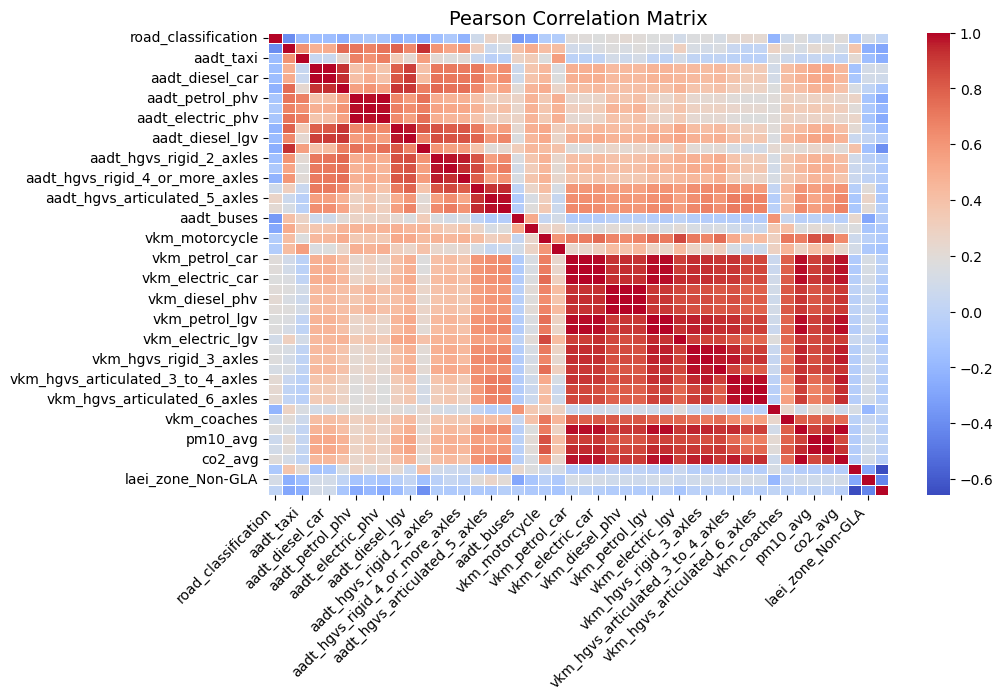

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
road_classification,1.000000,-0.402470,-0.166217,-0.155841,-0.162812,-0.227719,-0.109581,-0.075276,-0.111424,-0.212753,...,0.219235,-0.213039,0.092816,0.172102,0.074450,0.105268,0.185504,-0.088718,0.118570,0.007942
aadt_motorcycle,-0.402470,1.000000,0.617544,0.476365,0.502703,0.754016,0.718101,0.673768,0.723267,0.785891,...,0.022893,0.277218,0.192460,0.132794,0.218999,0.196393,0.113175,0.375889,-0.241012,-0.282121
aadt_taxi,-0.166217,0.617544,1.000000,0.045681,0.062008,0.233620,0.678484,0.617211,0.686996,0.337883,...,-0.018524,0.151050,0.079034,0.025134,0.042486,0.034890,0.014705,0.219038,-0.153136,-0.245055
aadt_petrol_car,-0.155841,0.476365,0.045681,1.000000,0.999451,0.917275,0.389556,0.483569,0.373365,0.798369,...,0.338779,0.101785,0.415064,0.466088,0.521108,0.518475,0.449276,-0.126317,0.111558,0.111078
aadt_diesel_car,-0.162812,0.502703,0.062008,0.999451,1.000000,0.929955,0.406492,0.497221,0.390649,0.812719,...,0.336070,0.108199,0.415615,0.464449,0.520561,0.517485,0.447442,-0.105598,0.103880,0.093642
aadt_electric_car,-0.227719,0.754016,0.233620,0.917275,0.929955,1.000000,0.560052,0.607392,0.548565,0.910073,...,0.279413,0.171327,0.389291,0.409794,0.474043,0.466193,0.391941,0.139394,0.010009,-0.108189
aadt_petrol_phv,-0.109581,0.718101,0.678484,0.389556,0.406492,0.560052,1.000000,0.986751,0.997399,0.658298,...,0.173847,0.194549,0.298351,0.259746,0.283020,0.279786,0.247716,0.270255,-0.115734,-0.257832
aadt_diesel_phv,-0.075276,0.673768,0.617211,0.483569,0.497221,0.607392,0.986751,1.000000,0.981389,0.687174,...,0.226908,0.181463,0.350988,0.321868,0.344443,0.343341,0.309252,0.196692,-0.089546,-0.191532
aadt_electric_phv,-0.111424,0.723267,0.686996,0.373365,0.390649,0.548565,0.997399,0.981389,1.000000,0.647187,...,0.168453,0.192967,0.290825,0.252515,0.274615,0.271475,0.240679,0.258821,-0.117596,-0.260974
aadt_petrol_lgv,-0.212753,0.785891,0.337883,0.798369,0.812719,0.910073,0.658298,0.687174,0.647187,1.000000,...,0.303286,0.192265,0.397005,0.428896,0.481550,0.476109,0.410636,0.212832,-0.031356,-0.170422


In [53]:
corr_matrix = compute_and_visualize_correlation(final_merged_df, method='pearson')

corr_matrix

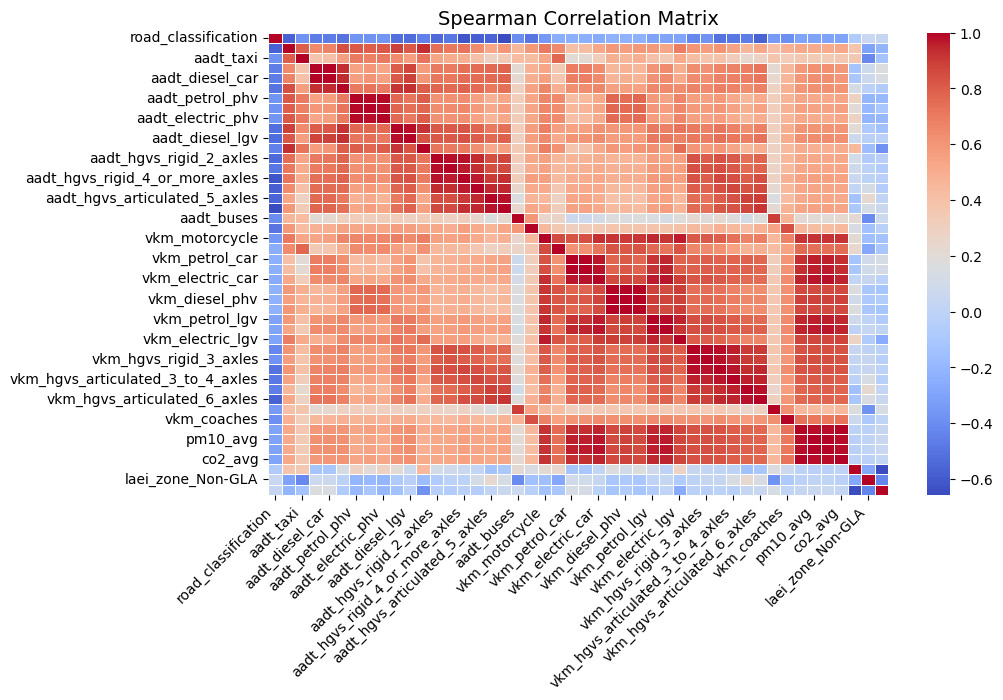

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
road_classification,1.000000,-0.572298,-0.375863,-0.462668,-0.470152,-0.503721,-0.370458,-0.382709,-0.369040,-0.521175,...,-0.571146,-0.339759,-0.395647,-0.296404,-0.304254,-0.300662,-0.297051,-0.073282,0.055131,0.037335
aadt_motorcycle,-0.572298,1.000000,0.795795,0.647746,0.670755,0.848543,0.814500,0.795642,0.814130,0.886692,...,0.527247,0.402081,0.484816,0.524075,0.511173,0.510625,0.524131,0.383425,-0.303597,-0.213494
aadt_taxi,-0.375863,0.795795,1.000000,0.382206,0.401914,0.564989,0.700057,0.679602,0.704035,0.638660,...,0.285057,0.373820,0.324932,0.360515,0.337137,0.335993,0.355446,0.355250,-0.417827,-0.128552
aadt_petrol_car,-0.462668,0.647746,0.382206,1.000000,0.999291,0.928376,0.548065,0.595091,0.537795,0.802894,...,0.721997,0.223456,0.451336,0.589533,0.621776,0.623421,0.591267,-0.120098,0.075942,0.161574
aadt_diesel_car,-0.470152,0.670755,0.401914,0.999291,1.000000,0.941269,0.566171,0.610896,0.556219,0.818744,...,0.721970,0.230913,0.457420,0.594552,0.625567,0.627169,0.596327,-0.099676,0.067537,0.141002
aadt_electric_car,-0.503721,0.848543,0.564989,0.928376,0.941269,1.000000,0.706798,0.724772,0.700277,0.917167,...,0.677148,0.283959,0.485818,0.604679,0.622280,0.623412,0.607079,0.121015,-0.018099,-0.068473
aadt_petrol_phv,-0.370458,0.814500,0.700057,0.548065,0.566171,0.706798,1.000000,0.993104,0.988880,0.770607,...,0.509395,0.311421,0.468330,0.536171,0.518785,0.519962,0.536813,0.290543,-0.206638,-0.185117
aadt_diesel_phv,-0.382709,0.795642,0.679602,0.595091,0.610896,0.724772,0.993104,1.000000,0.981271,0.777527,...,0.548079,0.307936,0.479117,0.557862,0.543092,0.544540,0.557701,0.202199,-0.184533,-0.112285
aadt_electric_phv,-0.369040,0.814130,0.704035,0.537795,0.556219,0.700277,0.988880,0.981271,1.000000,0.764959,...,0.497460,0.305769,0.459597,0.525351,0.507103,0.508268,0.525821,0.293732,-0.208270,-0.192763
aadt_petrol_lgv,-0.521175,0.886692,0.638660,0.802894,0.818744,0.917167,0.770607,0.777527,0.764959,1.000000,...,0.677713,0.302892,0.500165,0.607987,0.605413,0.606846,0.605045,0.207566,-0.076082,-0.141276


In [54]:
# Compute and visualize the correlation matrix using Spearman method
corr_matrix = compute_and_visualize_correlation(final_merged_df, method='spearman')

corr_matrix

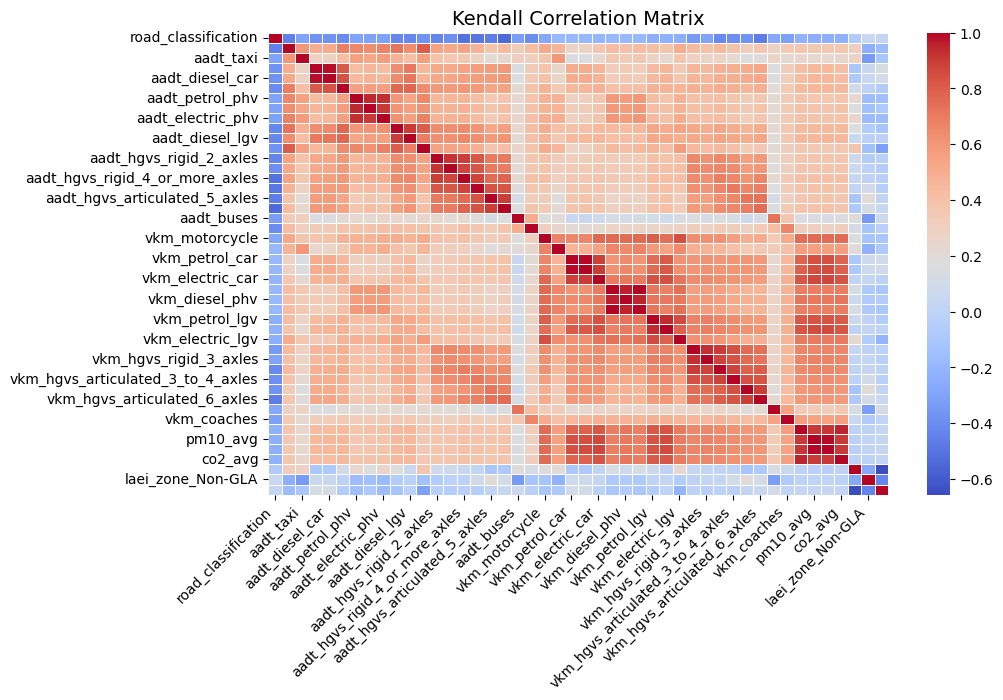

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
road_classification,1.000000,-0.452429,-0.295160,-0.371847,-0.377840,-0.406244,-0.294781,-0.306002,-0.310121,-0.424004,...,-0.466289,-0.277206,-0.317272,-0.234626,-0.240289,-0.237606,-0.235291,-0.069735,0.052462,0.035528
aadt_motorcycle,-0.452429,1.000000,0.604413,0.498838,0.515680,0.684676,0.657928,0.632859,0.675642,0.726237,...,0.368875,0.286270,0.340239,0.367558,0.358025,0.357592,0.367755,0.313384,-0.248138,-0.174494
aadt_taxi,-0.295160,0.604413,1.000000,0.279500,0.293250,0.416981,0.554678,0.533406,0.577331,0.477276,...,0.197327,0.267805,0.226658,0.248625,0.232063,0.231265,0.245201,0.290594,-0.341782,-0.105155
aadt_petrol_car,-0.371847,0.498838,0.279500,1.000000,0.983208,0.816151,0.419955,0.462122,0.423300,0.633268,...,0.532273,0.158414,0.316866,0.421341,0.447034,0.448390,0.422587,-0.098079,0.062018,0.131950
aadt_diesel_car,-0.377840,0.515680,0.293250,0.983208,1.000000,0.833098,0.433514,0.474104,0.437513,0.648730,...,0.532459,0.163738,0.321315,0.425330,0.450219,0.451537,0.426629,-0.081403,0.055156,0.115153
aadt_electric_car,-0.406244,0.684676,0.416981,0.816151,0.833098,1.000000,0.555604,0.571097,0.564674,0.772130,...,0.495420,0.203194,0.344534,0.435911,0.450259,0.451187,0.437836,0.099461,-0.014875,-0.056278
aadt_petrol_phv,-0.294781,0.657928,0.554678,0.419955,0.433514,0.555604,1.000000,0.948225,0.934479,0.602990,...,0.358404,0.221238,0.330997,0.377037,0.363722,0.364620,0.377791,0.237962,-0.169242,-0.151615
aadt_diesel_phv,-0.306002,0.632859,0.533406,0.462122,0.474104,0.571097,0.948225,1.000000,0.907810,0.609754,...,0.388864,0.218898,0.339358,0.394571,0.382973,0.384109,0.394648,0.165668,-0.151193,-0.091998
aadt_electric_phv,-0.310121,0.675642,0.577331,0.423300,0.437513,0.564674,0.934479,0.907810,1.000000,0.620842,...,0.368264,0.230105,0.342295,0.387994,0.373428,0.374340,0.388615,0.254365,-0.180357,-0.166928
aadt_petrol_lgv,-0.424004,0.726237,0.477276,0.633268,0.648730,0.772130,0.602990,0.609754,0.620842,1.000000,...,0.499213,0.219390,0.358462,0.440907,0.438541,0.439730,0.438381,0.171946,-0.063026,-0.117032


In [55]:
# Compute and visualize the correlation matrix using Kendall method
corr_matrix = compute_and_visualize_correlation(final_merged_df, method='kendall')

corr_matrix

In [56]:
df_correlations = pd.DataFrame(index=final_merged_df.columns)

# Pearson correlation
df_correlations["pearson_co2"] = final_merged_df.corrwith(final_merged_df["co2_avg"])

# Spearman correlation
df_correlations["spearman_co2"] = final_merged_df.corrwith(final_merged_df["co2_avg"], method="spearman")

# Kendall correlation
df_correlations["kendall_co2"] = final_merged_df.corrwith(final_merged_df["co2_avg"], method="kendall")

# F-statistic and p-value

float_columns = []

for c in final_merged_df.columns:
    if final_merged_df[c].dtype == float:
        float_columns.append(c)

X = final_merged_df[float_columns].copy()
y = final_merged_df["co2_avg"].copy()

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

fs = feature_selection.f_regression(X, y, center=True)

f_statistic = [float('{0:.10f}'.format(v)) for v in fs[0]]

f_statistic_series = pd.Series(f_statistic, float_columns)
df_correlations["f_statistic_co2"] = f_statistic_series

mi_r = feature_selection.mutual_info_regression(X, y)
mi_r_series = pd.Series(mi_r, float_columns)
df_correlations["mi_r_co2"] = mi_r_series

df_correlations

,pearson_co2,spearman_co2,kendall_co2,f_statistic_co2,mi_r_co2
road_classification,0.185504,-0.297051,-0.235291,NaN,NaN
aadt_motorcycle,0.113175,0.524131,0.367755,1.030017e+03,0.247755
aadt_taxi,0.014705,0.355446,0.245201,1.716875e+01,0.144426
aadt_petrol_car,0.449276,0.591267,0.422587,2.007638e+04,0.329022
aadt_diesel_car,0.447442,0.596327,0.426629,1.987184e+04,0.337763
aadt_electric_car,0.391941,0.607079,0.437836,1.440847e+04,0.309657
aadt_petrol_phv,0.247716,0.536813,0.377791,5.189840e+03,0.237520
aadt_diesel_phv,0.309252,0.557701,0.394648,8.395124e+03,0.244291
aadt_electric_phv,0.240679,0.525821,0.388615,4.881306e+03,0.198517
aadt_petrol_lgv,0.410636,0.605045,0.438381,1.610122e+04,0.295304


Index(['co2_avg', 'no2_avg', 'pm25_avg', 'vkm_diesel_lgv', 'vkm_electric_car',
       'pm10_avg', 'vkm_petrol_lgv', 'vkm_diesel_car', 'vkm_petrol_car',
       'vkm_diesel_phv', 'vkm_electric_lgv', 'vkm_hgvs_rigid_3_axles',
       'vkm_petrol_phv', 'vkm_electric_phv', 'vkm_hgvs_rigid_2_axles',
       'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles',
       'vkm_motorcycle', 'vkm_hgvs_articulated_5_axles',
       'vkm_hgvs_articulated_6_axles', 'vkm_coaches',
       'aadt_hgvs_articulated_6_axles', 'vkm_taxi', 'aadt_diesel_lgv',
       'aadt_hgvs_articulated_5_axles', 'aadt_hgvs_articulated_3_to_4_axles',
       'aadt_diesel_car', 'aadt_petrol_car', 'aadt_petrol_lgv',
       'aadt_electric_car', 'aadt_hgvs_rigid_3_axles',
       'aadt_hgvs_rigid_4_or_more_axles', 'aadt_hgvs_rigid_2_axles',
       'aadt_diesel_phv', 'aadt_petrol_phv', 'aadt_electric_phv',
       'aadt_electric_lgv', 'aadt_motorcycle', 'aadt_coaches', 'vkm_buses'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

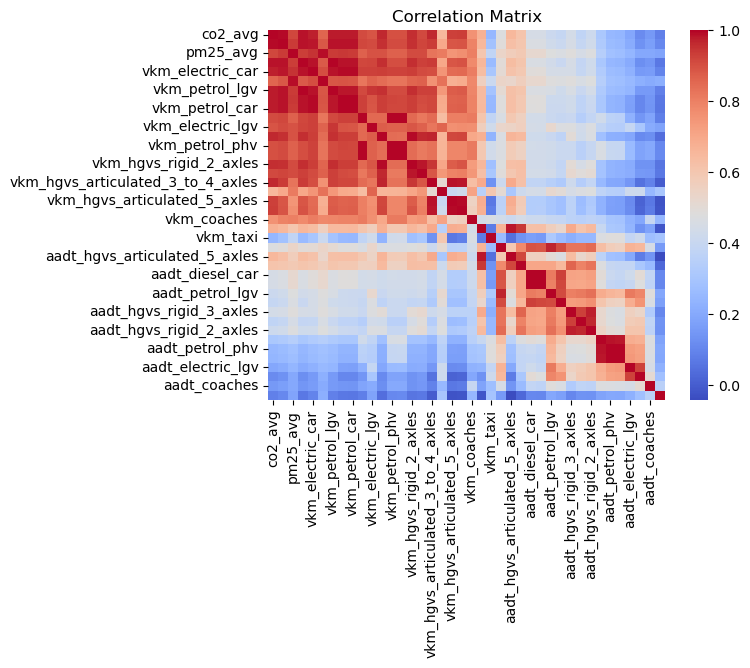

In [57]:
df_correlations['sum'] = df_correlations['pearson_co2'] + df_correlations['spearman_co2'] + df_correlations['kendall_co2']
df_correlations = df_correlations.nlargest(40, 'sum')

selected_columns = df_correlations.index
print(selected_columns)

df_processed = final_merged_df[df_correlations.index]

# Generate correlation heatmap
data_corr = df_processed.corr()
sns.heatmap(data_corr, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

In [58]:
final_merged_df.columns

Index(['road_classification', 'aadt_motorcycle', 'aadt_taxi',
       'aadt_petrol_car', 'aadt_diesel_car', 'aadt_electric_car',
       'aadt_petrol_phv', 'aadt_diesel_phv', 'aadt_electric_phv',
       'aadt_petrol_lgv', 'aadt_diesel_lgv', 'aadt_electric_lgv',
       'aadt_hgvs_rigid_2_axles', 'aadt_hgvs_rigid_3_axles',
       'aadt_hgvs_rigid_4_or_more_axles', 'aadt_hgvs_articulated_3_to_4_axles',
       'aadt_hgvs_articulated_5_axles', 'aadt_hgvs_articulated_6_axles',
       'aadt_buses', 'aadt_coaches', 'vkm_motorcycle', 'vkm_taxi',
       'vkm_petrol_car', 'vkm_diesel_car', 'vkm_electric_car',
       'vkm_petrol_phv', 'vkm_diesel_phv', 'vkm_electric_phv',
       'vkm_petrol_lgv', 'vkm_diesel_lgv', 'vkm_electric_lgv',
       'vkm_hgvs_rigid_2_axles', 'vkm_hgvs_rigid_3_axles',
       'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles',
       'vkm_hgvs_articulated_5_axles', 'vkm_hgvs_articulated_6_axles',
       'vkm_buses', 'vkm_coaches', 'no2_avg', 'pm10_avg', 'pm2

In [143]:
final_merged_df.head

<bound method NDFrame.head of        road_classification  aadt_motorcycle  aadt_taxi  aadt_petrol_car  \
0                        0            112.0       15.0           5470.0   
1                        0             68.0       10.0           3049.0   
2                        0            131.0       15.0           5752.0   
3                        0            178.0       14.0           7280.0   
4                        0            178.0       34.0           8433.0   
...                    ...              ...        ...              ...   
79383                    3            390.0     1100.0            448.0   
79384                    3            376.0      692.0            573.0   
79385                    3            210.0      586.0            241.0   
79386                    3            282.0      900.0            372.0   
79387                    3            210.0      586.0            241.0   

       aadt_diesel_car  aadt_electric_car  aadt_petrol_phv  aadt_dies

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2: Models Implementation

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)